In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_digits
digit=load_digits()

In [3]:
digits=pd.DataFrame(digit.data,columns=digit.feature_names)

In [4]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
digits['target']=digit.target

In [6]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
digits.iloc[1,:]

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     0.0
pixel_0_3    12.0
pixel_0_4    13.0
             ... 
pixel_7_4    16.0
pixel_7_5    10.0
pixel_7_6     0.0
pixel_7_7     0.0
target        1.0
Name: 1, Length: 65, dtype: float64

<Figure size 432x288 with 0 Axes>

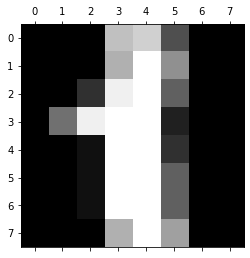

In [8]:
plt.gray()
plt.matshow(digit.data[1].reshape(8,8))

In [9]:
x=digits.drop('target',axis=1)
y=digit.target

In [10]:
from sklearn.preprocessing import MinMaxScaler 
scale=MinMaxScaler()
x_scale=scale.fit_transform(x)

In [11]:
x_scale

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

# we can also use  StandarsScaler ---- it transforms as -1 to +1

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.2,random_state=30)

In [13]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [14]:
lr.score(x_test,y_test)

0.9638888888888889

# using PCA to reduce Dimensions

In [15]:
from sklearn.decomposition import PCA
pca=PCA(0.95) # or we can specify the no. pca=PCA(n_components=29)
x_pca= pca.fit_transform(x)
x_pca.shape

(1797, 29)

In [16]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [17]:
pca.n_components_

29

In [18]:
x_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [20]:
reg=LogisticRegression(max_iter=1000)
reg.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [21]:
reg.score(X_test,Y_test)

0.9694444444444444

# EXERCISE

In [22]:
heart = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/18_PCA/Exercise/heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [23]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [31]:
df=heart

In [32]:
df1=df[df['Cholesterol']<=(df['Cholesterol'].mean()+3*df['Cholesterol'].std())]

In [34]:
df1.shape

(915, 12)

In [38]:
df[(df['MaxHR']>=df['MaxHR'].mean()+3*df['MaxHR'].std())]
#df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [39]:
df[(df['FastingBS']>=df['FastingBS'].mean()+3*df['FastingBS'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [41]:
df[(df['RestingBP']>df['RestingBP'].mean()+3*df['RestingBP'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [43]:
df2=df1[(df1['RestingBP']<=df1['RestingBP'].mean()+3*df1['RestingBP'].std())]

In [44]:
df2.shape

(908, 12)

In [47]:
df[(df['Oldpeak']>df['Oldpeak'].mean()+3*df['Oldpeak'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [48]:
df3=df2[(df2['Oldpeak']<=df2['Oldpeak'].mean()+3*df2['Oldpeak'].std())]

In [49]:
df3.shape

(902, 12)

In [50]:
df3.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [53]:
df3['Sex'].unique()

array(['M', 'F'], dtype=object)

In [54]:
df3['Sex']=df3['Sex'].apply(lambda x:1 if x=='M' else 0)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_19116\1101453721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Sex']=df3['Sex'].apply(lambda x:1 if x=='M' else 0)


In [55]:
df3.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [61]:
df3['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [64]:
df4=pd.get_dummies(df3,drop_first=True)

In [65]:
df4

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,1,0,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1.5,1,0,0,0,1,0,1,1,0
4,54,1,150,195,0,122,0.0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,1,144,193,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,0,130,236,0,174,0.0,1,1,0,0,0,0,0,1,0


In [66]:
x=df4.drop('HeartDisease',axis=1)
y=df4.HeartDisease

In [70]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scale=scale.fit_transform(x)

In [72]:
x_scale

array([[0.24489796, 1.        , 0.75675676, ..., 0.        , 0.        ,
        1.        ],
       [0.42857143, 0.        , 0.86486486, ..., 0.        , 1.        ,
        0.        ],
       [0.18367347, 1.        , 0.7027027 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59183673, 1.        , 0.7027027 , ..., 1.        , 1.        ,
        0.        ],
       [0.59183673, 0.        , 0.7027027 , ..., 0.        , 1.        ,
        0.        ],
       [0.20408163, 1.        , 0.74594595, ..., 0.        , 0.        ,
        1.        ]])

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.2, random_state=30)

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.861878453038674

# using PCA method

In [75]:
x

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,1,0,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,1,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1.5,0,0,0,1,0,1,1,0
4,54,1,150,195,0,122,0.0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1.2,0,0,1,1,0,0,1,0
914,68,1,144,193,1,141,3.4,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1.2,0,0,0,1,0,1,1,0
916,57,0,130,236,0,174,0.0,1,0,0,0,0,0,1,0


In [77]:
from sklearn.decomposition import PCA
pca= PCA(0.95)
x_pca=pca.fit_transform(x)

In [78]:
x_pca

array([[ 93.82516575, -29.40343477],
       [-15.58380044, -14.10534714],
       [ 83.29544144,  38.68553968],
       ...,
       [-67.57277874,  17.61565402],
       [ 40.70355216, -33.38308603],
       [-19.9132065 , -37.29321338]])

In [83]:
X_train,X_test,Y_train,Y_test = train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [84]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
rfc.score(X_test,Y_test)

0.7348066298342542